In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv('DataSet/HeightWeight.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [3]:
df.drop('Index', axis = 1, inplace=True)

In [4]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [5]:
df.insert(2, 'weight_in_kg', df['Weight(Pounds)'] / 2.205)
df.insert(3, 'height_in_meter', df['Height(Inches)'] / 39.37)

In [6]:
df.head()

,Height(Inches),Weight(Pounds),weight_in_kg,height_in_meter
0,65.78331,112.9925,51.243764,1.670899
1,71.51521,136.4873,61.899002,1.816490
2,69.39874,153.0269,69.399955,1.762732
3,68.21660,142.3354,64.551202,1.732705
4,67.78781,144.2971,65.440862,1.721814


In [7]:
df.corr()

,Height(Inches),Weight(Pounds),weight_in_kg,height_in_meter
Height(Inches),1.000000,0.502859,0.502859,1.000000
Weight(Pounds),0.502859,1.000000,1.000000,0.502859
weight_in_kg,0.502859,1.000000,1.000000,0.502859
height_in_meter,1.000000,0.502859,0.502859,1.000000


# BMI
### Formula :-
* Weight = 68 Kg, Height = 165 cm (1.65)^2 = 24.98
* `df.weight_in_kg / np.power(df.height_in_meter, 2)`

<table>
    <thead>
        <th>BMI</th>
        <th>Status</th>
    </thead>
    <tbody>
        <tr>
            <td><=18.4</td>
            <td>Under Weight</td>
        </tr>
        <tr>
            <td>18.5 - 24.9</td>
            <td>Normal</td>
        </tr>
        <tr>
            <td>25 - 39.9</td>
            <td>Over Weight</td>
        </tr>
        <tr>
            <td>>=18.4</td>
            <td>Obese</td>
        </tr>
    </tbody>
</table>

In [8]:
df.weight_in_kg.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25000 entries, 0 to 24999
Series name: weight_in_kg
Non-Null Count  Dtype  
--------------  -----  
25000 non-null  float64
dtypes: float64(1)
memory usage: 195.4 KB


In [9]:
df.height_in_meter.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25000 entries, 0 to 24999
Series name: height_in_meter
Non-Null Count  Dtype  
--------------  -----  
25000 non-null  float64
dtypes: float64(1)
memory usage: 195.4 KB


In [10]:
df.head()

,Height(Inches),Weight(Pounds),weight_in_kg,height_in_meter
0,65.78331,112.9925,51.243764,1.670899
1,71.51521,136.4873,61.899002,1.816490
2,69.39874,153.0269,69.399955,1.762732
3,68.21660,142.3354,64.551202,1.732705
4,67.78781,144.2971,65.440862,1.721814


In [11]:
df.weight_in_kg.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25000 entries, 0 to 24999
Series name: weight_in_kg
Non-Null Count  Dtype  
--------------  -----  
25000 non-null  float64
dtypes: float64(1)
memory usage: 195.4 KB


In [12]:
df.insert(4, 'BMI_Value', df.weight_in_kg / np.power(df.height_in_meter, 2))

In [13]:
df.head()

,Height(Inches),Weight(Pounds),weight_in_kg,height_in_meter,BMI_Value
0,65.78331,112.9925,51.243764,1.670899,18.354409
1,71.51521,136.4873,61.899002,1.816490,18.759344
2,69.39874,153.0269,69.399955,1.762732,22.335046
3,68.21660,142.3354,64.551202,1.732705,21.500820
4,67.78781,144.2971,65.440862,1.721814,22.073776


In [14]:
def classifyBmi(x):
    bmilist = []
    a = x.value_counts().sum()
    for i in range(a):
        if x[i]<=18.4:
            bmilist.append('Under Weight')
        elif x[i] < 24.9:
            bmilist.append('Normal')
        elif x[i] < 39.9:
            bmilist.append('Over Weight')
        else: bmilist.append('Obese')
    return bmilist

In [15]:
df.BMI_Value.value_counts().sum()

25000

In [16]:
df.BMI_Value[0]

18.35440918794094

In [17]:
myList = classifyBmi(df.BMI_Value)

In [18]:
df.insert(5, 'BMI_Result', myList)

In [19]:
df.sample(5)

,Height(Inches),Weight(Pounds),weight_in_kg,height_in_meter,BMI_Value,BMI_Result
6602,69.06664,131.9619,59.846667,1.754296,19.446173,Normal
17313,69.99442,124.9403,56.662268,1.777862,17.926601,Under Weight
16436,67.85083,104.3679,47.332381,1.723415,15.935983,Under Weight
8716,69.00290,124.9629,56.672517,1.752677,18.448822,Normal
22972,70.38587,126.0902,57.183764,1.787805,17.890917,Under Weight


In [20]:
df.BMI_Result.unique()

array(['Under Weight', 'Normal', 'Over Weight'], dtype=object)

In [21]:
df.BMI_Result.value_counts()

Normal          18095
Under Weight     6899
Over Weight         6
Name: BMI_Result, dtype: int64

In [22]:
df.BMI_Result

0        Under Weight
1              Normal
2              Normal
3              Normal
4              Normal
             ...     
24995    Under Weight
24996          Normal
24997          Normal
24998          Normal
24999          Normal
Name: BMI_Result, Length: 25000, dtype: object

In [23]:
le = LabelEncoder()
df.insert(6, 'BMI_Encoded', le.fit_transform(df.BMI_Result))

In [24]:
df.sample(5)

,Height(Inches),Weight(Pounds),weight_in_kg,height_in_meter,BMI_Value,BMI_Result,BMI_Encoded
19983,67.62555,116.0675,52.638322,1.717692,17.840674,Under Weight,2
8773,65.08665,120.4446,54.623401,1.653204,19.985993,Normal,0
2132,68.79538,130.9320,59.379592,1.747406,19.446860,Normal,0
23039,73.95494,154.3987,70.022086,1.878459,19.844104,Normal,0
24813,66.36458,116.3494,52.766168,1.685664,18.570076,Normal,0


In [25]:
df.BMI_Encoded.unique()

array([2, 0, 1])

In [26]:
encoded_table = pd.DataFrame(columns=['Under Weight', 'Normal', 'Over Weight'],data=[[2, 0, 1]], index=[0])
encoded_table

,Under Weight,Normal,Over Weight
0,2,0,1


In [27]:
new_df = df.drop(['Height(Inches)', 'Weight(Pounds)', 'BMI_Result', 'weight_in_kg', 'height_in_meter'], axis = 1)

In [28]:
new_df.head()

,BMI_Value,BMI_Encoded
0,18.354409,2
1,18.759344,0
2,22.335046,0
3,21.500820,0
4,22.073776,0


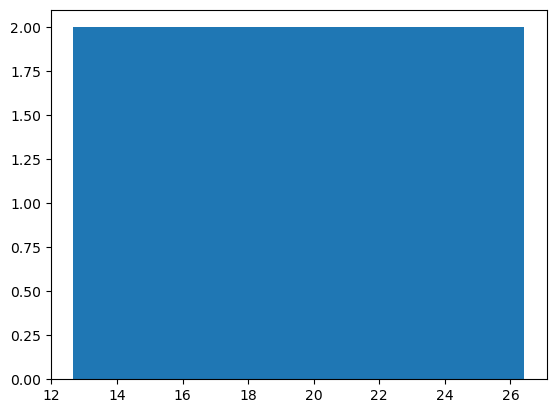

In [29]:
plt.bar(new_df.BMI_Value, height=2)
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(new_df[['BMI_Value']], new_df.BMI_Encoded, test_size=0.2)

In [31]:
X_train.head(1)

,BMI_Value
16839,21.331846


In [32]:
len(X_test)

5000

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_Predict = lr.predict(X_test)

In [35]:
cross_val_score(LinearRegression(), X_train, y_train)

array([0.53839734, 0.54846526, 0.55556356, 0.55674577, 0.54753147])

In [36]:
cross_val_score(LogisticRegression(), X_train, y_train)

array([0.9995 , 0.99975, 0.9995 , 0.99975, 0.9995 ])

In [37]:
model = LogisticRegression()

In [38]:
model.fit(X_train.values, y_train)

LogisticRegression()

In [39]:
predicted = model.predict(X_test.values)

In [40]:
predicted.shape

(5000,)

In [41]:
y_test.shape

(5000,)

In [42]:
score = model.score(X_test.values, predicted)

In [49]:
score

1.0

In [43]:
accuracy_score(predicted, y_test)

0.9996

In [44]:
confussion = confusion_matrix(y_test, predicted)

In [45]:
print('Machine Accuracy', score * 100,'%')

Machine Accuracy 100.0 %


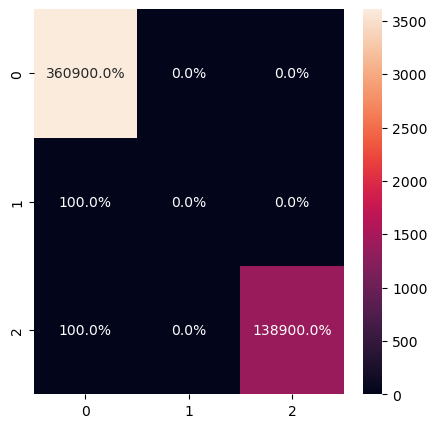

In [46]:
label = ['Under Weight', 'Normal', 'Over Weight']
plt.figure(figsize=(5, 5))
sns.heatmap(confussion, annot=True, fmt='0.1%')
plt.show()

In [47]:
model.predict([[1]])

array([2])

<table>
    <thead>
        <th>BMI</th>
        <th>Status</th>
    </thead>
    <tbody>
        <tr>
            <td><=18.4</td>
            <td>Under Weight</td>
        </tr>
        <tr>
            <td>18.5 - 24.9</td>
            <td>Normal</td>
        </tr>
        <tr>
            <td>25 - 39.9</td>
            <td>Over Weight</td>
        </tr>
        <tr>
            <td>>=18.4</td>
            <td>Obese</td>
        </tr>
    </tbody>
</table>

In [58]:
pickle.dump(model, open('model.pkl', 'wb'))
#pickle.dump(mnb, open('model.pkl', 'wb'))